# **Breast Cancer Classification**

### **Problem Statement**

### Predicting if a breast cancer diagnosis is benign or malignant based on 30 different features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

### Key Information:
 - **Number of Instances**: 569 (212 Malignant, 357 Benign)
 - **Features**: 30 numeric attributes including:
   - Radius (mean of distances from center to points on the perimeter)
   - Texture (standard deviation of gray-scale values)
   - Perimeter, Area, Smoothness, Compactness, etc.
 - **Target Classes**: 
   - Malignant (0)
   - Benign (1)
 
 Dataset source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Set consistent plotting style
sns.set(style="whitegrid")
%matplotlib inline

### Data Loading and Initial Exploration

In [20]:
# Load dataset from sklearn
cancer = load_breast_cancer()
    
# Print key dataset information
print("Target names:", cancer['target_names'])
print("\nFeature names:\n", cancer['feature_names'])
print("\nData shape:", cancer['data'].shape)
    
# Create DataFrame combining features and target
df = pd.DataFrame(
    np.c_[cancer['data'], cancer['target']],
    columns=np.append(cancer['feature_names'], ['target'])
)
    
# Load and explore data
df.head()

Target names: ['malignant' 'benign']

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Data shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Data Visualization

Text(0.5, 1.02, 'Pairplot of Selected Features')

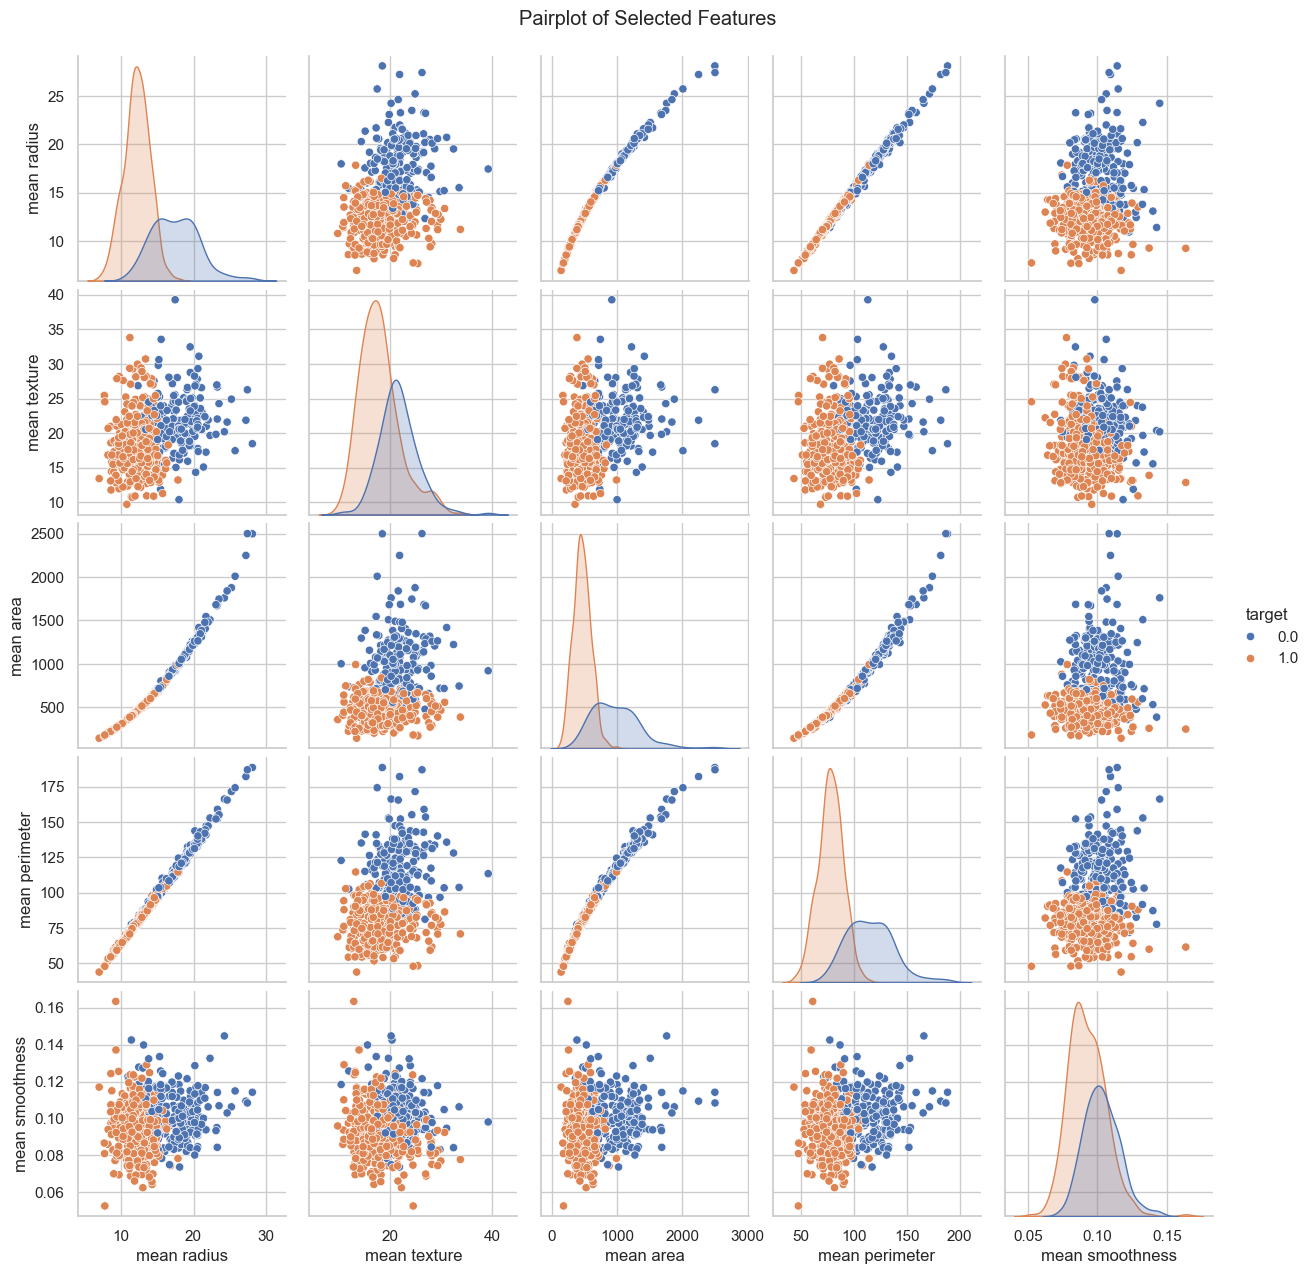

In [21]:
selected_features = ['mean radius', 'mean texture', 'mean area', 
                    'mean perimeter', 'mean smoothness']
sns.pairplot(df, hue='target', vars=selected_features, height=2.5)
plt.suptitle("Pairplot of Selected Features", y=1.02)

Text(0.5, 1.0, 'Class Distribution (0 = Malignant, 1 = Benign)')

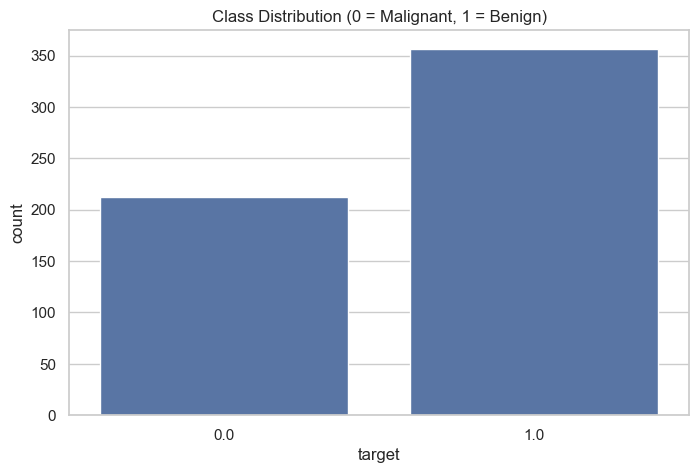

In [22]:
# Target class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(1.5, 0, 'mean texture'),
  Text(2.5, 0, 'mean perimeter'),
  Text(3.5, 0, 'mean area'),
  Text(4.5, 0, 'mean smoothness'),
  Text(5.5, 0, 'mean compactness'),
  Text(6.5, 0, 'mean concavity'),
  Text(7.5, 0, 'mean concave points'),
  Text(8.5, 0, 'mean symmetry'),
  Text(9.5, 0, 'mean fractal dimension'),
  Text(10.5, 0, 'radius error'),
  Text(11.5, 0, 'texture error'),
  Text(12.5, 0, 'perimeter error'),
  Text(13.5, 0, 'area error'),
  Text(14.5, 0, 'smoothness error'),
  Text(15.5, 0, 'compactness error'),
  Text(16.5, 0, 'concavity error'),
  Text(17.5, 0, 'concave points error'),
  Text(18.5, 0, 'symmetry error'),
  Text(19.5, 0, 'fractal dimension error'),
  Text(20.5, 0, 'worst radius'),
  Text(21.5, 0, 'worst texture'),
  Text(22.5

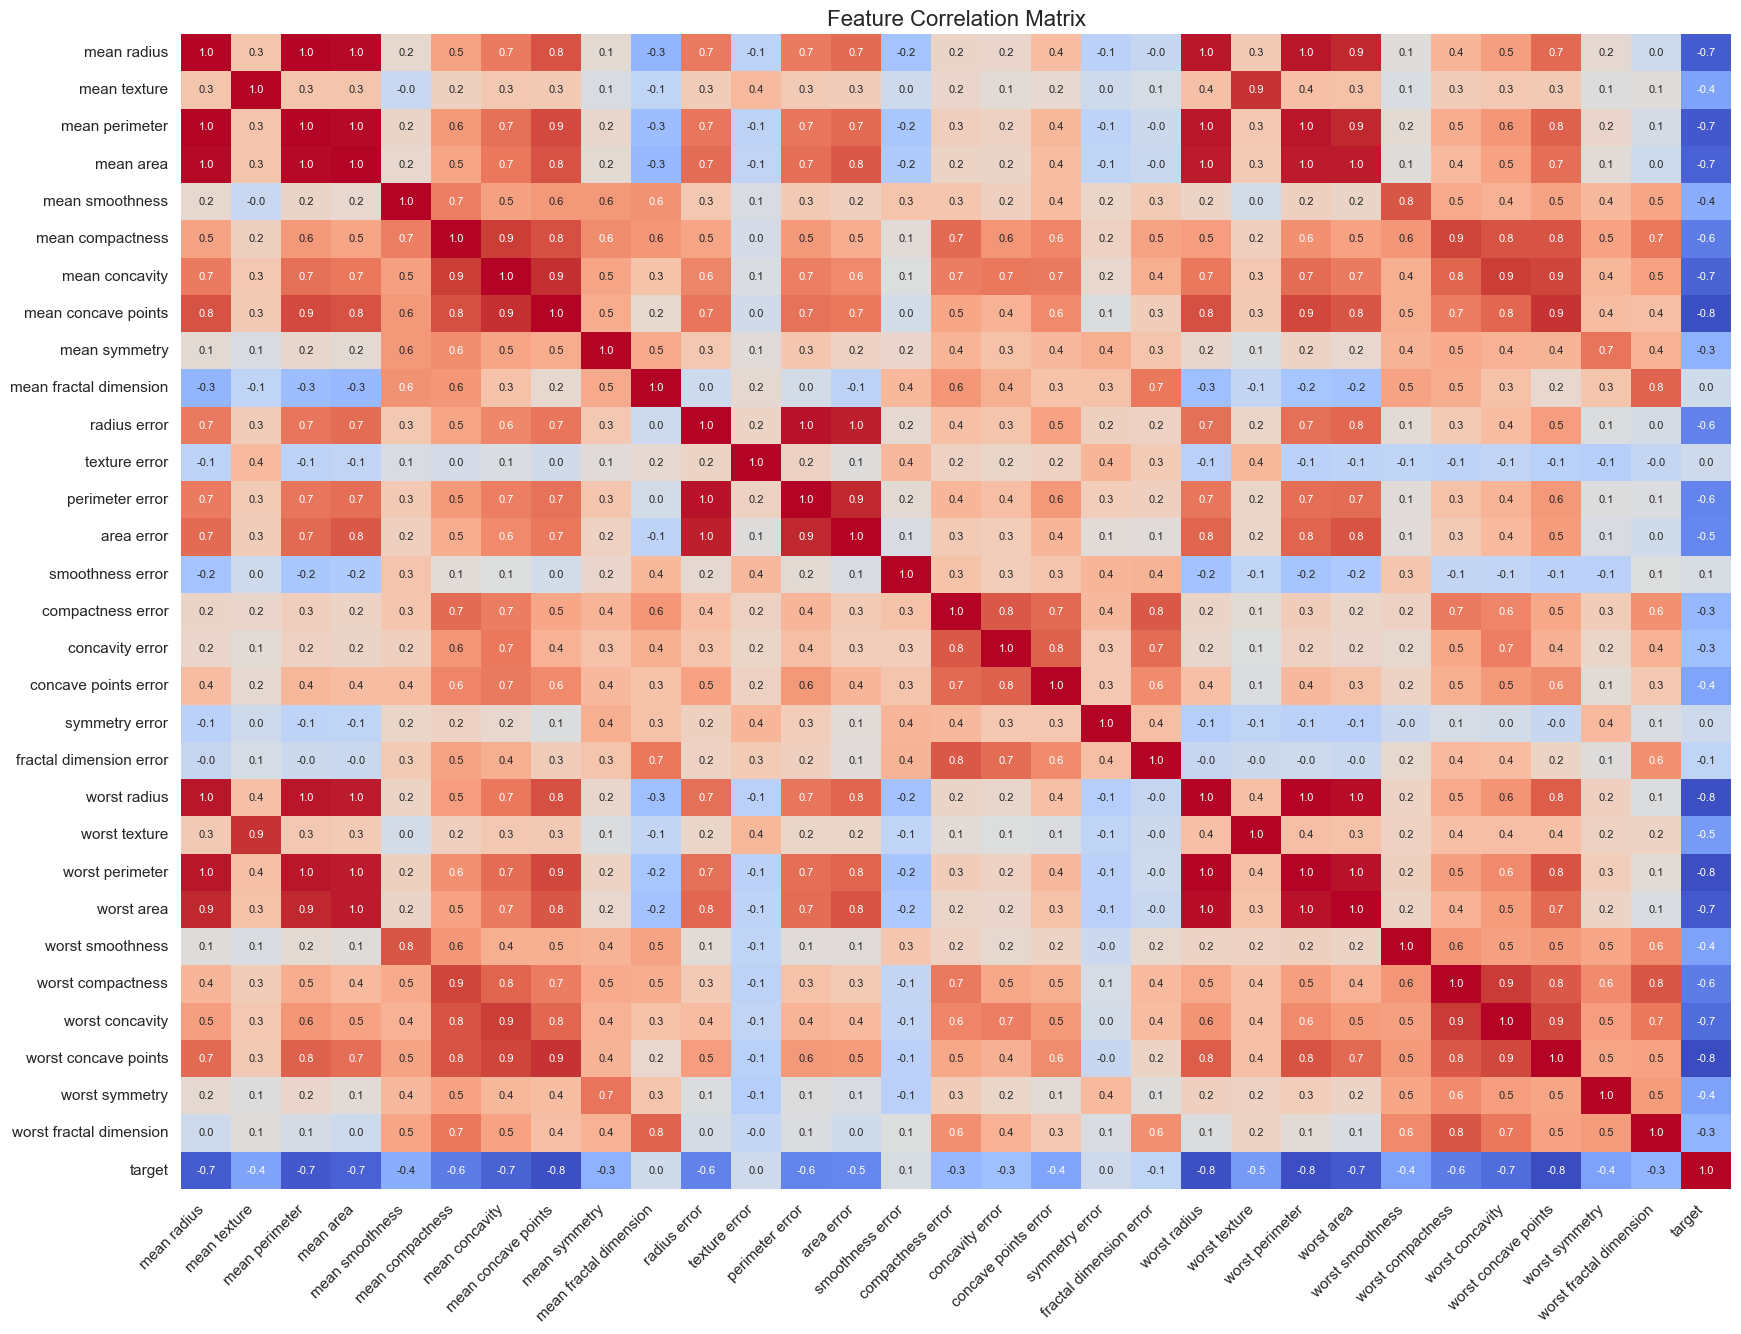

In [23]:
# Feature correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="coolwarm", 
            annot_kws={"size": 8}, cbar=False)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Mean Area vs Mean Smoothness by Diagnosis')

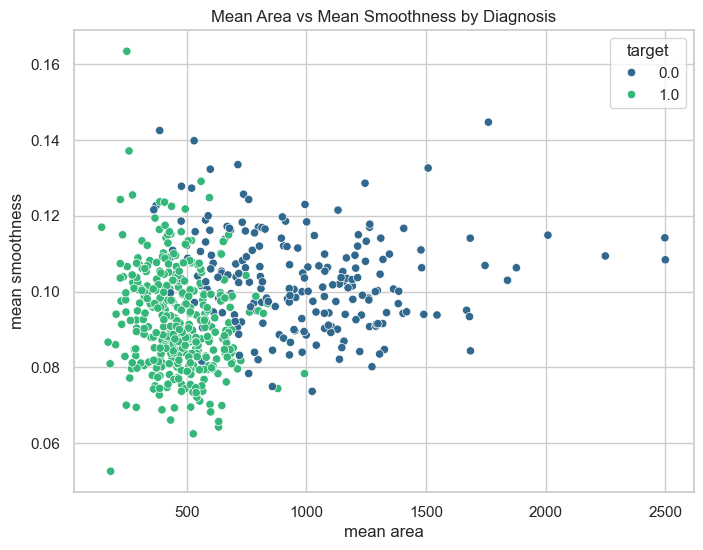

In [24]:
# Scatter plot of two important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean area', y='mean smoothness', 
                hue='target', data=df, palette="viridis")
plt.title("Mean Area vs Mean Smoothness by Diagnosis")

### Data Preparation and Model Training

In [25]:
# Separate features and target
X = df.drop(['target'], axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline Model Training and Evaluation

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.93        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



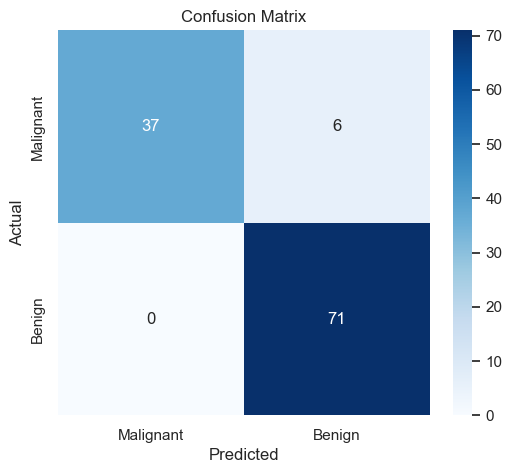

In [26]:
# Initialize and train SVM model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

print("Classification Report:\n", report)

### Hyperparameter Tuning with Grid Search

In [27]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    refit=True,
    verbose=2,  # Reduced verbosity for cleaner output
    cv=5,  # Added cross-validation
    n_jobs=-1  # Use all available cores
)

grid.fit(X_train, y_train)

print("\nBest parameters found:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best estimator: SVC(C=1, gamma=0.001)


### Evaluating the Tuned Model

Tuned Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      1.00      0.55        43
         1.0       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



d:\Anish\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\Anish\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anish\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anish\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

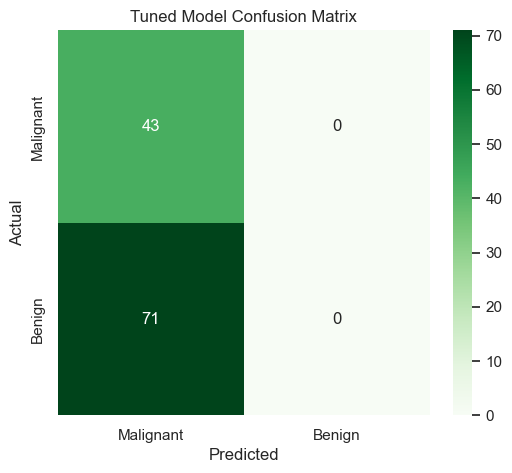

In [28]:
# Make predictions with tuned model
grid_predictions = tuned_model.predict(X_test)

# Generate and display confusion matrix
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title("Tuned Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Print classification report
print("Tuned Model Classification Report:\n", classification_report(y_test, grid_predictions))